# Prediksi `Salary: Annual compensation in USD`

Link dataset: https://www.kaggle.com/datasets/gmudit/employer-data/data

In [175]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import OneHotEncoder

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

## 1. Overview Dataset

In [129]:
df = pd.read_csv("data/Employers_data.csv")
df.shape

(10000, 10)

In [130]:
df.sample(10)

,Employee_ID,Name,Age,Gender,Department,Job_Title,Experience_Years,Education_Level,Location,Salary
814,815,Joe Upshaw,32,Male,Engineering,Engineer,9,Master,Seattle,100000
5322,5323,Janet Suarez,52,Female,Sales,Executive,29,Master,Chicago,195000
4071,4072,Susie Muncy,39,Female,Engineering,Manager,16,Master,Chicago,130000
9584,9585,Ted Gifford,25,Male,Engineering,Intern,0,Bachelor,San Francisco,40000
1934,1935,Carlos Christman,46,Male,Product,Manager,23,Master,Austin,145000
1986,1987,Robert Thurman,24,Male,Marketing,Analyst,1,Master,Seattle,65000
7976,7977,Natasha Pierce,28,Female,Product,Engineer,7,Bachelor,Seattle,85000
8870,8871,Toni Clark,25,Female,Sales,Analyst,4,Bachelor,Seattle,65000
6972,6973,Shawn Perez,24,Male,Engineering,Intern,1,Bachelor,New York,30000
761,762,Lora Cohen,49,Female,HR,Manager,26,Master,New York,155000


In [131]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Employee_ID       10000 non-null  int64 
 1   Name              10000 non-null  object
 2   Age               10000 non-null  int64 
 3   Gender            10000 non-null  object
 4   Department        10000 non-null  object
 5   Job_Title         10000 non-null  object
 6   Experience_Years  10000 non-null  int64 
 7   Education_Level   10000 non-null  object
 8   Location          10000 non-null  object
 9   Salary            10000 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 781.4+ KB


In [132]:
df.describe()

,Employee_ID,Age,Experience_Years,Salary
count,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,35.455900,12.370900,115381.500000
std,2886.89568,10.000213,9.148951,46066.139047
min,1.00000,21.000000,0.000000,25000.000000
25%,2500.75000,27.000000,5.000000,70000.000000
50%,5000.50000,34.000000,10.000000,120000.000000
75%,7500.25000,43.000000,19.000000,150000.000000
max,10000.00000,60.000000,37.000000,215000.000000


## 2. Data Cleaning

In [133]:
df.isna().sum() / len(df) * 100

Employee_ID         0.0
Name                0.0
Age                 0.0
Gender              0.0
Department          0.0
Job_Title           0.0
Experience_Years    0.0
Education_Level     0.0
Location            0.0
Salary              0.0
dtype: float64

In [134]:
df.duplicated().sum()

np.int64(0)

In [135]:
df = df.drop("Name", axis=1)

In [136]:
df.head()

,Employee_ID,Age,Gender,Department,Job_Title,Experience_Years,Education_Level,Location,Salary
0,1,24,Female,Engineering,Engineer,1,Master,Austin,90000
1,2,56,Male,Sales,Executive,33,Master,Seattle,195000
2,3,21,Male,Engineering,Intern,1,Bachelor,New York,35000
3,4,30,Male,Finance,Analyst,9,Bachelor,New York,75000
4,5,25,Female,HR,Analyst,2,Master,Seattle,70000


Text(0, 0.5, 'Expeprience Years')

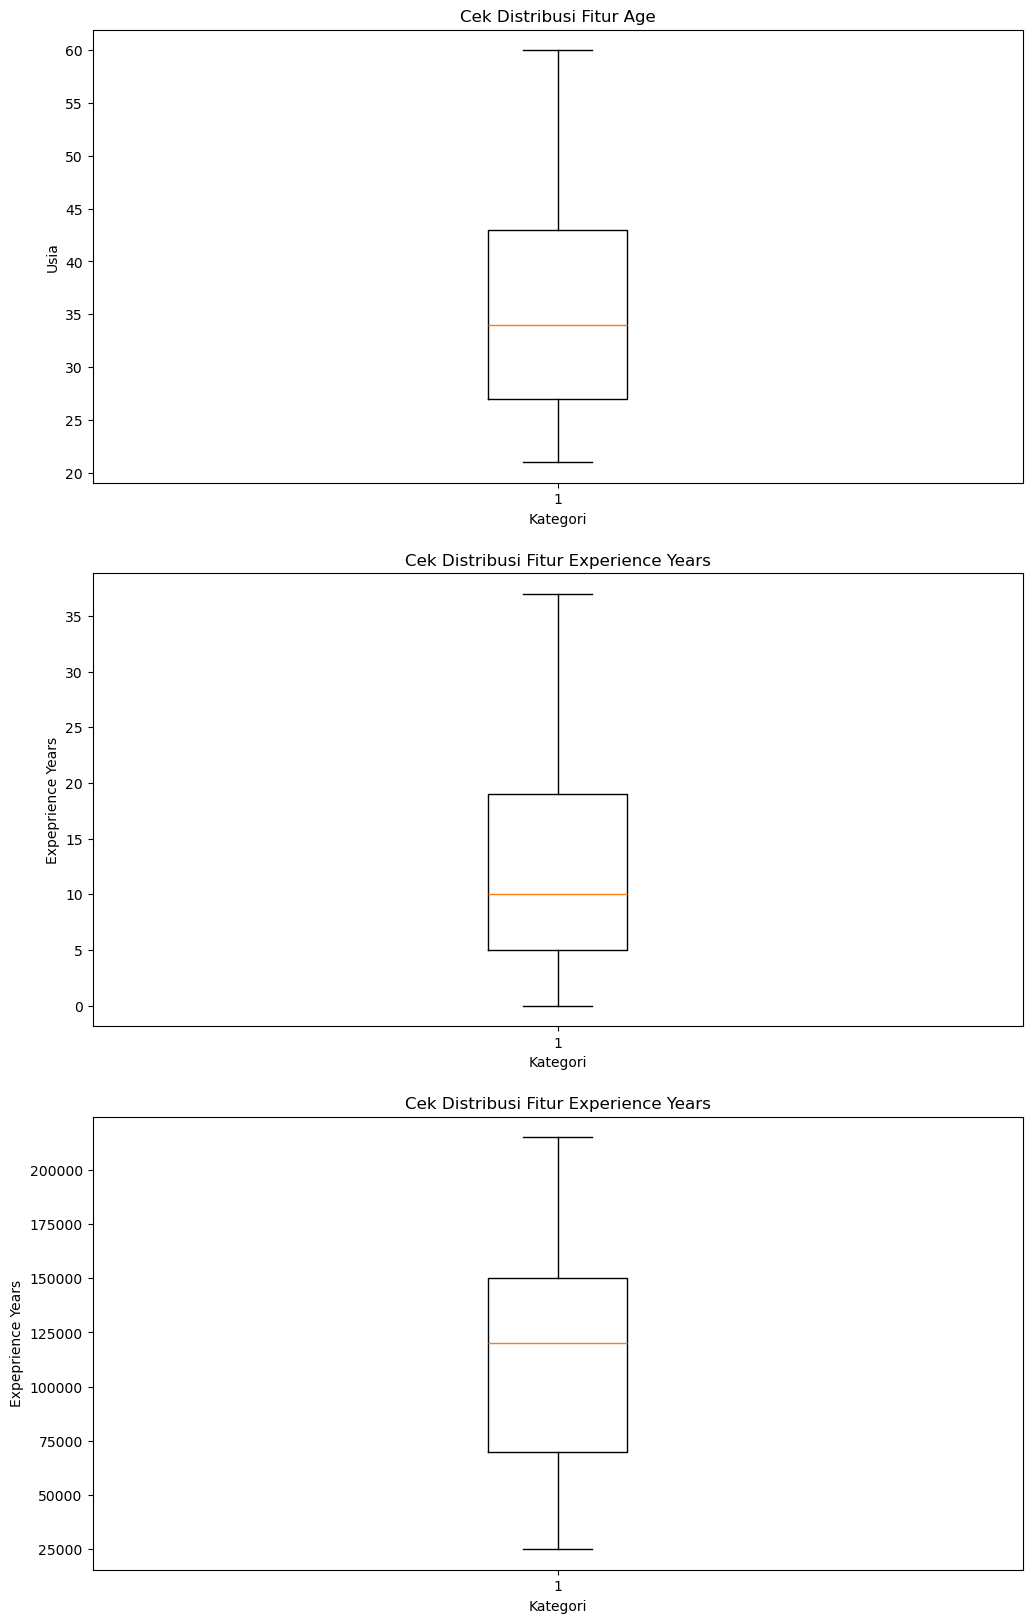

In [137]:
fig, axs = plt.subplots(3, 1, figsize=(12, 20))

axs[0].boxplot(df["Age"])
axs[0].set_title("Cek Distribusi Fitur Age")
axs[0].set_xlabel("Kategori")
axs[0].set_ylabel("Usia")

axs[1].boxplot(df["Experience_Years"])
axs[1].set_title("Cek Distribusi Fitur Experience Years")
axs[1].set_xlabel("Kategori")
axs[1].set_ylabel("Expeprience Years")

axs[2].boxplot(df["Salary"])
axs[2].set_title("Cek Distribusi Fitur Experience Years")
axs[2].set_xlabel("Kategori")
axs[2].set_ylabel("Expeprience Years")

### 2.1 Deskripsi singkat encode
- `Gender` -> Female: 0 dan Male: 1
- `Education_Level` -> Bachelor: 0, Master: 1, PhD: 3

In [138]:
df["Gender"] = df["Gender"].map({"Female": 0, "Male": 1})
df["Education_Level"] = df["Education_Level"].map({"Bachelor": 0, "Master": 1, "PhD": 3})
df = df.drop("Employee_ID", axis=1)

In [139]:
df.sample(10)

,Age,Gender,Department,Job_Title,Experience_Years,Education_Level,Location,Salary
7394,37,1,Sales,Executive,14,1,Austin,165000
2901,25,0,Engineering,Intern,1,0,New York,35000
9908,36,0,HR,Manager,13,1,Chicago,125000
9693,59,1,Finance,Executive,36,1,New York,205000
6641,48,0,Marketing,Manager,25,1,Chicago,150000
3699,38,1,Product,Engineer,11,3,Chicago,115000
7406,37,1,Finance,Executive,10,3,Austin,160000
977,27,1,Sales,Analyst,4,1,New York,70000
4442,25,1,Sales,Analyst,4,0,San Francisco,70000
8,43,1,Marketing,Manager,16,3,San Francisco,135000


## 3. Melakukan agregasi

In [140]:
# Rata rata gaji per jabatan
df.groupby("Job_Title")["Salary"].agg("mean").round(0)

Job_Title
Analyst       69478.0
Engineer      99273.0
Executive    183415.0
Intern        35802.0
Manager      135260.0
Name: Salary, dtype: float64

In [141]:
# Rata rata gaji per lokasi dan jabatan
df.groupby(["Location", "Job_Title"])["Salary"].agg("mean").round(0).unstack()

Job_Title,Analyst,Engineer,Executive,Intern,Manager
Location,,,,,
Austin,69700.0,99399.0,184297.0,36799.0,134969.0
Chicago,69036.0,99861.0,182066.0,35570.0,135776.0
New York,69447.0,100146.0,184105.0,35654.0,134985.0
San Francisco,69872.0,98042.0,183355.0,35378.0,135333.0
Seattle,69377.0,98963.0,183225.0,35347.0,135236.0


In [142]:
# Rata rata pengalaman kerja per jabatan
df.groupby("Job_Title")["Experience_Years"].agg("mean").round(0)

Job_Title
Analyst       5.0
Engineer      9.0
Executive    23.0
Intern        1.0
Manager      16.0
Name: Experience_Years, dtype: float64

In [143]:
# Rata rata gaji per department
df.groupby("Department")["Salary"].agg("mean").round(0)

Department
Engineering     90680.0
Finance        130376.0
HR             126401.0
Marketing      101735.0
Product        116676.0
Sales          127310.0
Name: Salary, dtype: float64

In [144]:
# Rata rata gaji per pendidikan
df.groupby("Education_Level")["Salary"].agg("mean")

Education_Level
0     69529.724933
1    134234.279919
3    152137.359384
Name: Salary, dtype: float64

## 4. Split dataset dan pemodelan

In [145]:
df.head()

,Age,Gender,Department,Job_Title,Experience_Years,Education_Level,Location,Salary
0,24,0,Engineering,Engineer,1,1,Austin,90000
1,56,1,Sales,Executive,33,1,Seattle,195000
2,21,1,Engineering,Intern,1,0,New York,35000
3,30,1,Finance,Analyst,9,0,New York,75000
4,25,0,HR,Analyst,2,1,Seattle,70000


In [150]:
category_features = ["Department", "Job_Title", "Location"]
category_transform = Pipeline(steps=[
    ("ohe", OneHotEncoder(handle_unknown="ignore"))
])

numerical_features = ["Age", "Experience_Years", "Education_Level"]

binary_feature = ["Gender"]

preprocessing = ColumnTransformer(transformers=[
    ("cat", category_transform, category_features),
    ("num", "passthrough",numerical_features),
    ("bin", "passthrough",binary_feature)
])

model = Pipeline(steps=[
    ("preprocessing", preprocessing),
    ("model", RandomForestRegressor())
])

X = df.drop("Salary", axis=1)
y = df["Salary"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model.fit(X_train, y_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('cat',
                                                  Pipeline(steps=[('ohe',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Department', 'Job_Title',
                                                   'Location']),
                                                 ('num', 'passthrough',
                                                  ['Age', 'Experience_Years',
                                                   'Education_Level']),
                                                 ('bin', 'passthrough',
                                                  ['Gender'])])),
                ('model', RandomForestRegressor())])

### 4.1 Base Line Evaluasi Matrik 

In [151]:
model.score(X_test, y_test)

0.9885891870989235

In [158]:
y_pred = model.predict(X_test)
cross_val = cross_val_score(model, X= X_train, y= y_train, cv=5, scoring="r2")
cross_val

array([0.98935732, 0.98867922, 0.98830834, 0.98846017, 0.98851818])

In [164]:
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
print(f"R2: {round(r2, 2)}\nMAE: {round(mae, 2)}\nMSE: {round(mse, 2)}")

R2: 0.99
MAE: 3904.86
MSE: 24050136.67


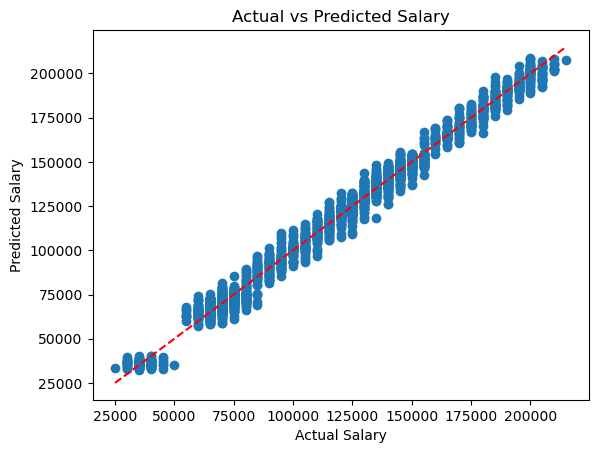

In [167]:
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Salary")
plt.ylabel("Predicted Salary")
plt.title("Actual vs Predicted Salary")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.show()

In [168]:
df["Salary"].describe()

count     10000.000000
mean     115381.500000
std       46066.139047
min       25000.000000
25%       70000.000000
50%      120000.000000
75%      150000.000000
max      215000.000000
Name: Salary, dtype: float64

In [169]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

print("Train R²:", r2_train)
print("Test R² :", r2_test)

Train R²: 0.9949614759937423
Test R² : 0.9885891870989235


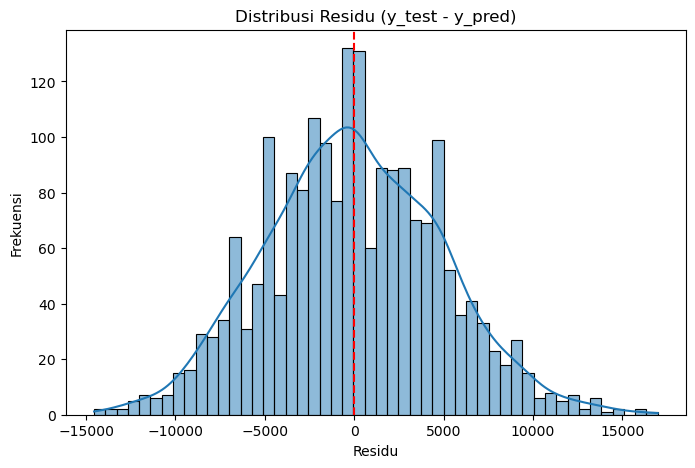

In [171]:
residuals = y_test - y_test_pred

plt.figure(figsize=(8, 5))
sns.histplot(residuals, bins=50, kde=True)
plt.title("Distribusi Residu (y_test - y_pred)")
plt.xlabel("Residu")
plt.ylabel("Frekuensi")
plt.axvline(0, color='red', linestyle='--')
plt.show()


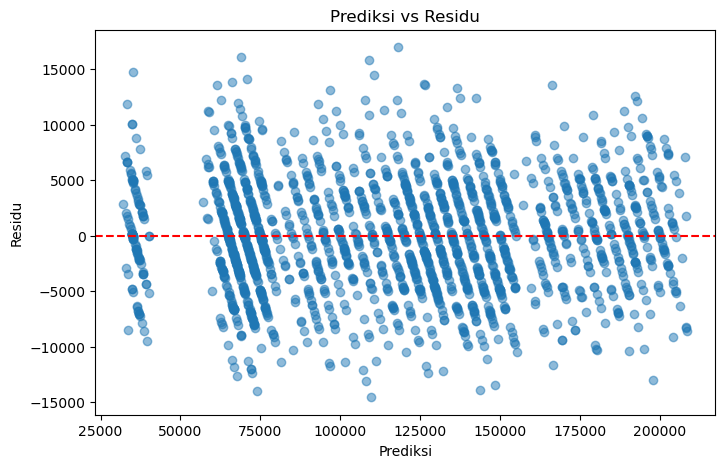

In [172]:
plt.figure(figsize=(8, 5))
plt.scatter(y_test_pred, residuals, alpha=0.5)
plt.title("Prediksi vs Residu")
plt.xlabel("Prediksi")
plt.ylabel("Residu")
plt.axhline(0, color='red', linestyle='--')
plt.show()


### 4.2 Hyperparameter Tunning Model

In [180]:
pipe_grid = {
    "model__n_estimators": [100, 1000],
    "model__max_depth": [None, 10, 20, 30],
    "model__min_samples_split": [2, 4, 6],
    "model__min_samples_leaf": [2, 4],
    "model__max_features": [1.0, "sqrt"]
}

gs_model = GridSearchCV(estimator=model, param_grid=pipe_grid, cv=5, n_jobs=-1, verbose=2)
gs_model.fit(X_train, y_train)

Fitting 5 folds for each of 96 candidates, totalling 480 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessing',
                                        ColumnTransformer(transformers=[('cat',
                                                                         Pipeline(steps=[('ohe',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['Department',
                                                                          'Job_Title',
                                                                          'Location']),
                                                                        ('num',
                                                                         'passthrough',
                                                                         ['Age',
                                                                          'Experience_Years',
                                                                          'Education_Level']),
                                                                        ('bin',
                                                                         'passthrough',
                                                                         ['Gender'])])),
                                       ('model', RandomForestRegressor())]),
             n_jobs=-1,
             param_grid={'model__max_depth': [None, 10, 20, 30],
                         'model__max_features': [1.0, 'sqrt'],
                         'model__min_samples_leaf': [2, 4],
                         'model__min_samples_split': [2, 4, 6],
                         'model__n_estimators': [100, 1000]},
             verbose=2)

#### 4.2.1 Model Tunning Evaluasi Metrik

In [181]:
gs_model.score(X_train, y_train)

0.992980240709066

In [186]:
best_model = gs_model.best_estimator_
y_pred2 = best_model.predict(X_test)
cross_val = cross_val_score(best_model, X= X_train, y= y_train, cv=5, scoring="r2")
cross_val

array([0.99105005, 0.99087236, 0.99088788, 0.99052957, 0.99039787])

In [187]:
r2 = r2_score(y_test, y_pred2)
mae = mean_absolute_error(y_test, y_pred2)
mse = mean_squared_error(y_test, y_pred2)
print(f"R2: {round(r2, 2)}\nMAE: {round(mae, 2)}\nMSE: {round(mse, 2)}")

R2: 0.99
MAE: 3486.55
MSE: 19029942.44


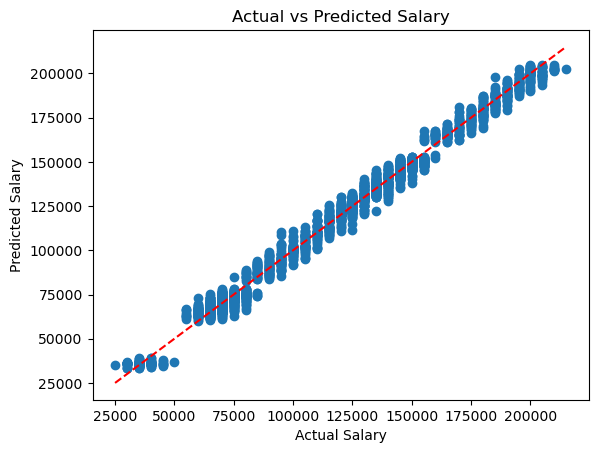

In [220]:
plt.scatter(y_test, y_pred2)
plt.xlabel("Actual Salary")
plt.ylabel("Predicted Salary")
plt.title("Actual vs Predicted Salary")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.show()

In [221]:
y_train_pred2 = best_model.predict(X_train)
y_test_pred2 = best_model.predict(X_test)

r2_train = r2_score(y_train, y_train_pred2)
r2_test = r2_score(y_test, y_test_pred2)

print("Train R²:", r2_train)
print("Test R² :", r2_test)

Train R²: 0.992980240709066
Test R² : 0.9909710653327503


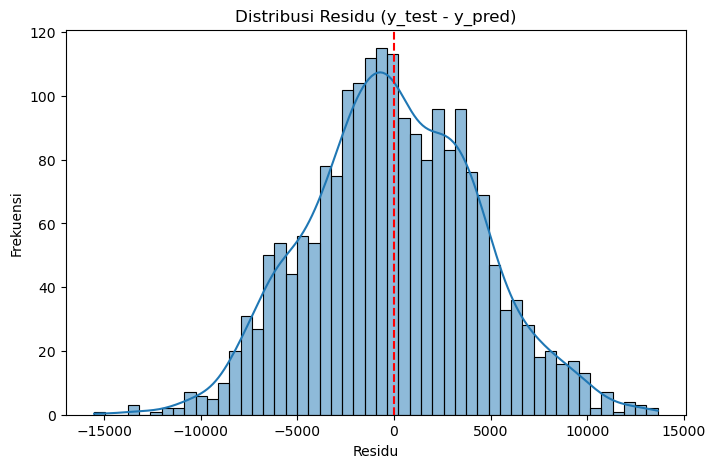

In [222]:
residuals = y_test - y_test_pred2

plt.figure(figsize=(8, 5))
sns.histplot(residuals, bins=50, kde=True)
plt.title("Distribusi Residu (y_test - y_pred)")
plt.xlabel("Residu")
plt.ylabel("Frekuensi")
plt.axvline(0, color='red', linestyle='--')
plt.show()


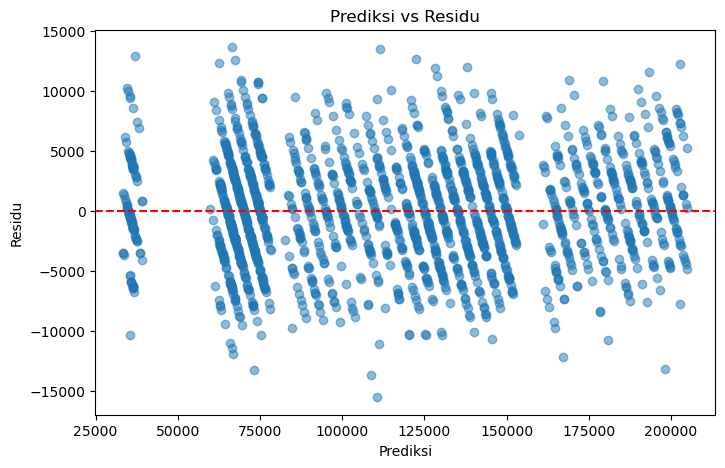

In [223]:
plt.figure(figsize=(8, 5))
plt.scatter(y_test_pred2, residuals, alpha=0.5)
plt.title("Prediksi vs Residu")
plt.xlabel("Prediksi")
plt.ylabel("Residu")
plt.axhline(0, color='red', linestyle='--')
plt.show()

## 5. Menerapkan kepada data baru untuk BaseLine Model maupun Tunning Model

In [213]:
new_employee = pd.DataFrame({
    "Age": [53],
    "Gender": ["Male"],
    "Department": ["Marketing"],
    "Job_Title": ["Manager"],
    "Experience_Years": [29],
    "Education_Level": ["Bachelor"],
    "Location": ["Chicago"]
})

# --- 3. LAKUKAN PREDIKSI ---

# Melakukan encoding manual pada data baru
new_employee["Gender"] = new_employee["Gender"].map({"Female": 0, "Male": 1})
new_employee["Education_Level"] = new_employee["Education_Level"].map({"Bachelor": 0, "Master": 1, "PhD": 3})

# Memprediksi gaji
predicted_salary = model.predict(new_employee)
predicted_salary2 = best_model.predict(new_employee)

# Menampilkan hasil
print(f"Prediksi Gaji Tahunan: ${predicted_salary[0]:,.2f} USD")
print(f"Prediksi Gaji Tahunan: ${predicted_salary2[0]:,.2f} USD")

Prediksi Gaji Tahunan: $152,567.54 USD
Prediksi Gaji Tahunan: $144,312.73 USD


## Kesimpulan

- Metrics Eval Sebelum tunning:
  - R2: 0.99
  - MAE: 3904.86
  - MSE: 24050136.67
- Metrics Eval Sesudah tunning:
  - R2: 0.99
  - MAE: 3486.55
  - MSE: 19029942.44

Terdapat penurunan dibagian `MAE` dan `MSE` pada model yang sudah ditunning. Kalian bisa langsung menggunakan model ini atau melakukan beberapa `Evaluasi` lagi untuk memastikan bahwa model benar benar bagus atau mengalama kendala (Seperti `overfit`/`underfit`, dll).

Jika ada perbaikan/saran untuk membuat model jauh lebih baik, silahkan beritahu...